In [1]:
from music21 import converter
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import seaborn as sns

In [7]:
def get_data(filenames):
    data = []
    for filename in filenames:
        s = converter.parse(filename)
        pitches = [note.pitch.ps for note in s.flat.notes]
        intervals = [a - b for a, b in zip(pitches[0:], pitches[1:])]
        for int_1, int_2 in zip(intervals[0:], intervals[1:]):
            if int_1 < int_2:
                data.append([int_1, int_2, np.abs(int_1) + np.abs(int_2)])
            else:
                data.append([int_2, int_1, np.abs(int_1) + np.abs(int_2)])
    return np.array(sorted(data, key=lambda p: p[2]))

In [55]:
def show_data(X, ms=0.1, alpha=0.5):
    plt.figure(figsize=(8, 4))
    ax1 = plt.subplot(121)
    jitter = np.random.normal(0, 0.15, len(X))
    plt.plot(X[:, 0] + jitter, range(len(X)), '.', alpha=alpha, ms=ms, color='C3')
    sns.despine()
#     plt.xlim(-9, 3)

    plt.subplot(122, sharey=ax1)
    plt.plot(X[:, 1] + jitter, range(len(X)), '.', alpha=alpha, ms=ms, color='C0')
    sns.despine(left=True)
    plt.yticks([])
#     plt.xlim(-2, 10)

In [9]:
datasets = '../../datasets'
sioux_pat = f'{datasets}/densmore-teton-sioux/data/kern/*.krn'
menominee_pat = f'{datasets}/densmore-menominee/data/*.krn'
nootka_pat = f'{datasets}/densmore-nootka/data/*.krn'
ute_pat = f'{datasets}/densmore-northern-ute/data/*.krn'

In [14]:
sioux = get_data(glob.glob(sioux_pat))

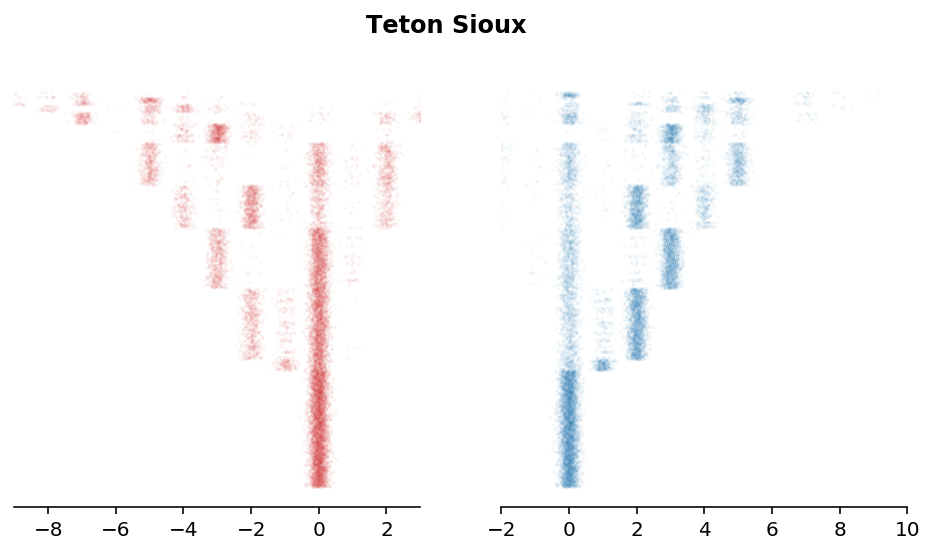

In [21]:
show_data(sioux)
plt.suptitle('Teton Sioux', fontweight='bold');

In [31]:
menominee = get_data(glob.glob(menominee_pat))

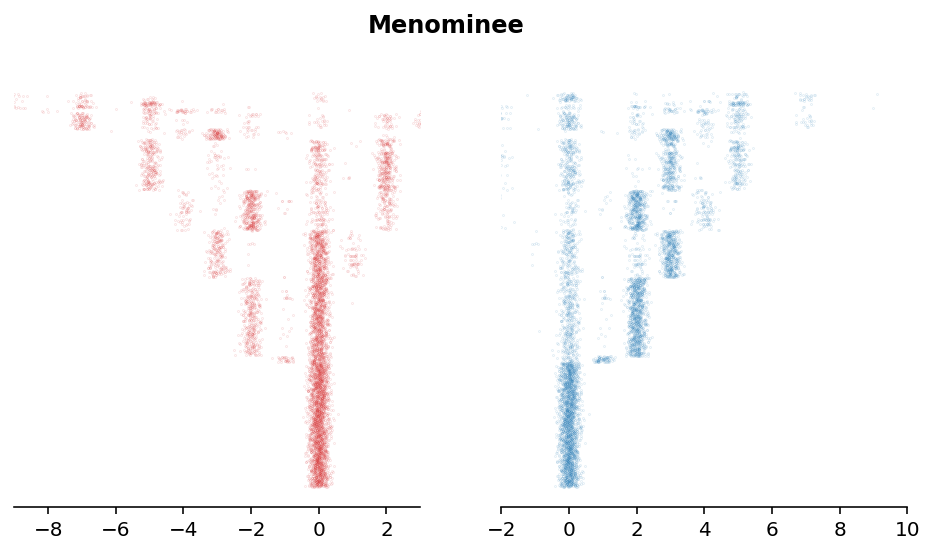

In [32]:
show_data(menominee, ms=.2)
plt.suptitle('Menominee', fontweight='bold');

In [33]:
nootka = get_data(glob.glob(nootka_pat))

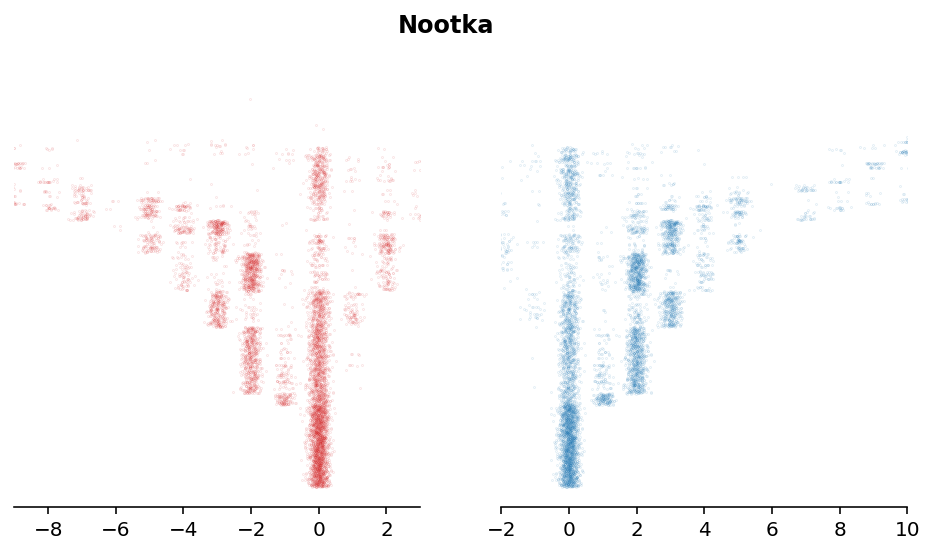

In [34]:
show_data(nootka, ms=.2)
plt.suptitle('Nootka', fontweight='bold');

In [37]:
ute = get_data(glob.glob(ute_pat))

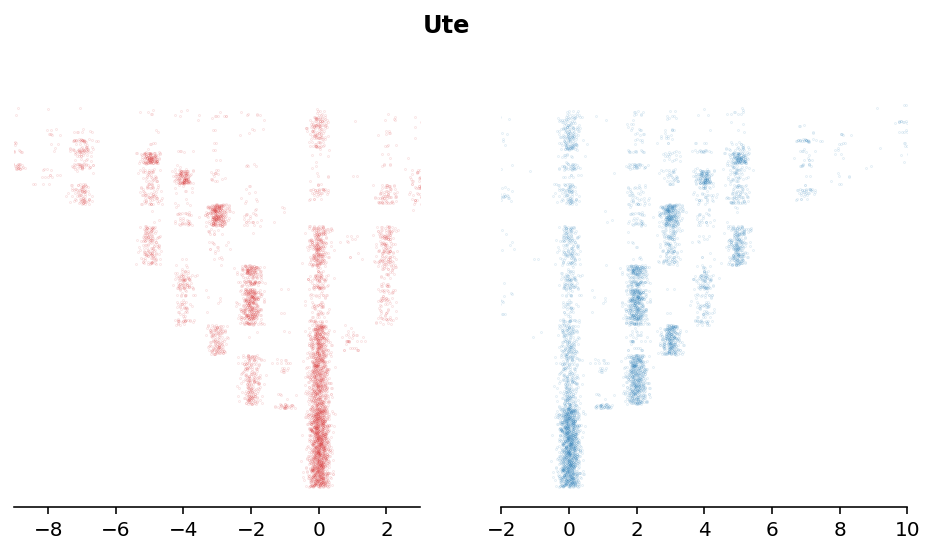

In [38]:
show_data(ute, ms=.2)
plt.suptitle('Ute', fontweight='bold');

In [43]:
pueblo_pat = f'{datasets}/densmore-pueblo/data/*.krn'
pueblo = get_data(glob.glob(pueblo_pat))

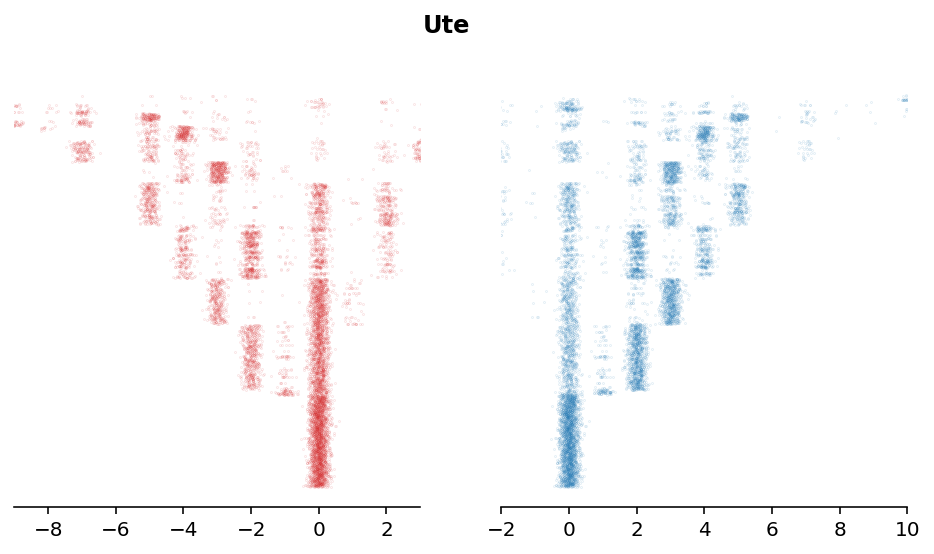

In [44]:
show_data(pueblo, ms=.2)
plt.suptitle('Ute', fontweight='bold');

In [39]:
boehme_pat = f'{datasets}/boehme-altdeutsches-liederbuch/data/*.krn'
boehme = get_data(glob.glob(boehme_pat))

humdrum.spineParser: WARNING: Error in parsing event ('*MX') at position 8 for spine None: Incorrect meter: *MX found
humdrum.spineParser: WARNING: Error in parsing event ('*MX') at position 8 for spine None: Incorrect meter: *MX found


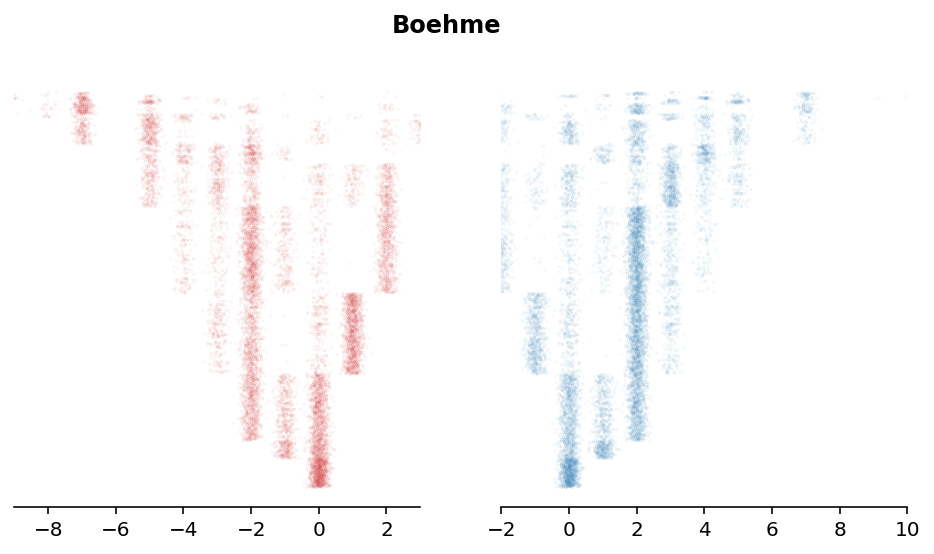

In [40]:
show_data(boehme)
plt.suptitle('Boehme', fontweight='bold');

# Random

In [64]:
def sequence_to_data(intervals):
    data = []
    for int_1, int_2 in zip(intervals[0:], intervals[1:]):
        if int_1 < int_2:
            data.append([int_1, int_2, np.abs(int_1) + np.abs(int_2)])
        else:
            data.append([int_2, int_1, np.abs(int_1) + np.abs(int_2)])
    return np.array(sorted(data, key=lambda p: p[2]))

In [112]:
def show_rand_data(X, ms=0.1, alpha=0.5):
    plt.figure(figsize=(8, 4))
#     ax1 = plt.subplot(121)
    plt.plot(-1*X[:, 0], range(len(X)), '.', alpha=alpha, ms=ms, color='C3')
#     sns.despine()

#     plt.subplot(122, sharey=ax1)
    plt.plot(X[:, 1], range(len(X)), '.', alpha=alpha, ms=ms, color='C0')
#     sns.despine(left=True)
#     plt.yticks([])
#     plt.xlim(-2, 10)

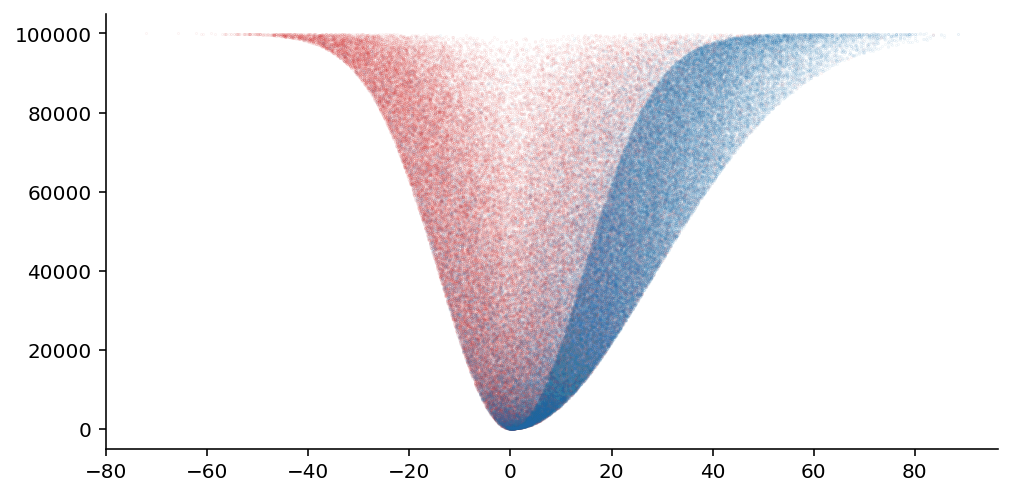

In [132]:
sequence = np.random.normal(10,20, 100000)
random_data = sequence_to_data(sequence)
show_rand_data(random_data, ms=0.1)
# plt.suptitle('Random', fontweight='bold');
sns.despine()

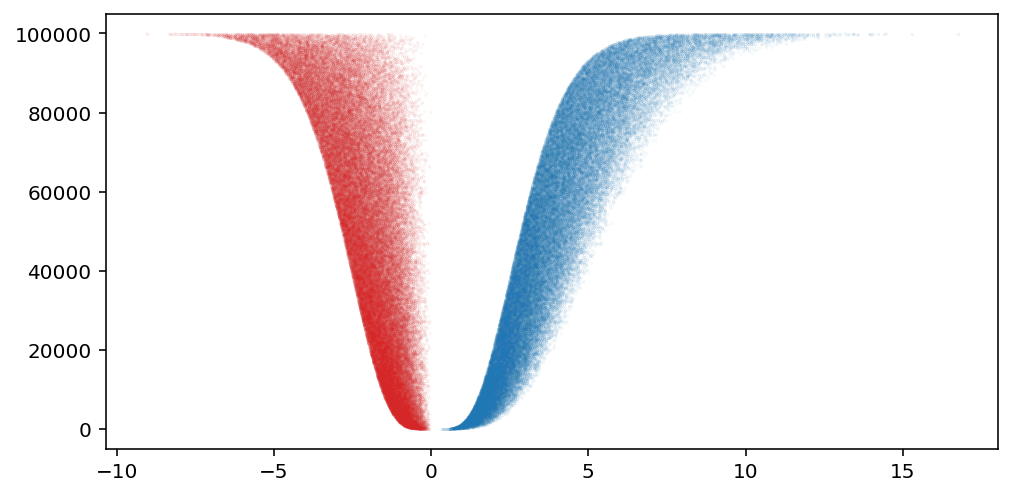

In [133]:
sequence = np.random.gamma(3, size=100000)
random_data = sequence_to_data(sequenc
show_rand_data(random_data, ms=0.1)
# plt.suptitle('Random', fontweight='bold');

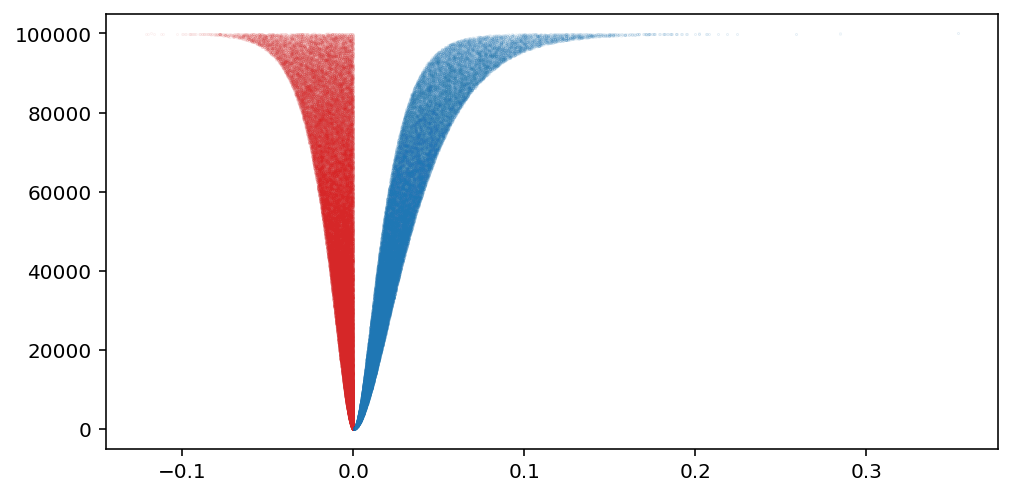

In [141]:
sequence = np.random.pareto(50, size=100000)
random_data = sequence_to_data(sequence)
show_rand_data(random_data, ms=0.1)
# plt.suptitle('Random', fontweight='bold');

In [ ]:
#Maybe you should scale horizontally depending on the sum?